In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
PLOT_ERR_BARS = False

In [2]:
res = pickle.load(open("eval_results.p", "rb"))

In [3]:
def make_barplot(display_names, means, errors, title=None, colors=None, labels=None, figsize=(7,5), legend='outside'):
    x_pos = np.arange(len(display_names))
    
    #print results
    s = ""
    for (name, score) in zip(display_names, means):
        s += '{}: {:04.1f}\n'.format(name, score)
    print(s)
    
    if colors is None:
        # make dummy colors
        colors = [None] * len(display_names)
    if labels is None:
        # make dummy labels
        labels = [None] * len(display_names)
        
    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    for i in range(len(display_names)):
        yerr = errors[i] if PLOT_ERR_BARS else None
        ax.bar(x_pos[i], means[i], yerr=yerr, align='center', color=colors[i], label=labels[i], alpha=0.6, ecolor='black', capsize=10)
    ax.set_ylabel('2AFC score [%]')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(display_names, rotation='vertical')
    
    min_val = 50 if np.min(means) > 50 else np.min(means) - 5
    max_val = max(means + errors)
    max_val = max_val // 5 * 5 + 5
    
    ax.set_ylim(min_val, max_val)
    if title is not None:
        ax.set_title(title)
    #ax.yaxis.grid(True)
    plt.subplots_adjust(bottom=0.15)
    
    if legend=='outside':
        plt.legend(loc=4, ncol=1)
        ax.legend(bbox_to_anchor=(1., 1.))
    elif legend=='inside':
        plt.legend(loc=4, ncol=2, prop={'size': 9})

    # Save the figure and show
    plt.tight_layout()
    #plt.savefig('bar_plot_with_error_bars.png')
    #plt.show()

In [4]:
def set_bar_color(model_name):
    if 'Human' in model_name:
        return '#000000'
    
    if 'Deeploss' in model_name:
        if '[LA]' in model_name:
            return 'lightgrey'
        else:
            return '#8c2b2b'
    
    if 'Deeploss' in model_name \
        or 'L1' in model_name \
        or 'L2' in model_name \
        or 'SSIM' in model_name:
        
        if "[LA]" in model_name:
            # not ours and grayscale
            return 'darkgrey'#'#00006e'
        else:
            # not ours and rgb
            return 'firebrick'#'#6e0000'
    else:
        if "[LA]" in model_name:
            # ours and grayscale
            return 'dimgrey' 
        else:
            # ours and rgb
            return '#FF0000'
    
    return '#FF0000'

def plot_results(results, per_dataset=False, datasets=None, order=None, labels=None, display_names=None, title=None, legend='outside', figsize=(7,5)):
    # sort
    if order is None:
        models = list(results.keys())
        models = sorted(models)
    else:
        models = order
    
    # data shaping
    if datasets is None:
        datasets = results[models[0]].keys()
    
    means = np.zeros((len(models), len(datasets)))
    for i, dataset in enumerate(datasets):
        try:
            means[:, i] = [results[model][dataset]['score'] for model in models]
        except:
            print('missing ' + dataset)
        
    # mean over all datasets
    all_means = np.array(means)
    
    means = all_means.mean(axis=1)
    errors = all_means.var(axis=1)
        
    # colors
    colors = [set_bar_color(model) for model in models]
    
    if display_names is None:
        display_names = models
    make_barplot(display_names, means *100, errors * 100, title, colors=colors, labels=labels, legend=legend, figsize=figsize)      
    
    return models, means

Human: 73.7
$L_{1}$: 60.8
$L_{SE}$: 60.5
SSIM: 61.5
Watson-DCT: 60.4
Watson-DFT: 63.6
Deeploss-VGG: 65.8
Deep.-Squeeze: 66.3
$L_{1}$: 63.3
$L_{SE}$: 62.9
SSIM: 63.1
Watson-DCT: 60.4
Watson-DFT: 66.0
Deeploss-VGG: 68.9
Deep.-Squeeze: 69.9



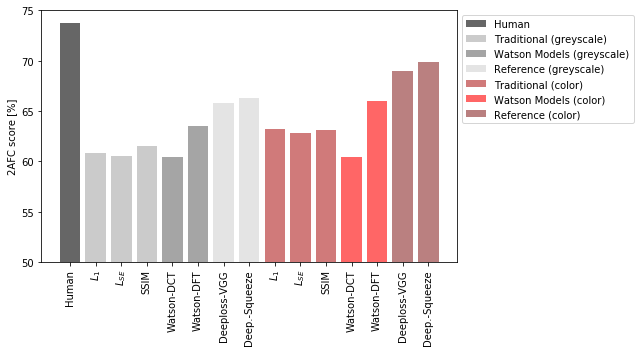

In [5]:
order = ['Human', 'L1 [LA]', 'L2 [LA]', 'SSIM [LA]', 'Watson-dct [LA]', 'Watson-fft [LA]', 'Deeploss-vgg [LA]', 'Deeploss-squeeze [LA]', 'L1', 'L2', 'SSIM', 'Watson-dct',  'Watson-fft', 'Deeploss-vgg', 'Deeploss-squeeze']
display_names =  ['Human', '$L_{1}$', '$L_{SE}$', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'Deeploss-VGG', 'Deep.-Squeeze', '$L_{1}$', '$L_{SE}$', 'SSIM', 'Watson-DCT', 'Watson-DFT', 'Deeploss-VGG', 'Deep.-Squeeze']
labels = ['Human', 'Traditional (greyscale)', None, None, 'Watson Models (greyscale)', None, 'Reference (greyscale)', None, 'Traditional (color)', None, None, 'Watson Models (color)', None, 'Reference (color)', None]


_ = plot_results(res, order=order, title=None, per_dataset=False, labels=labels, display_names=display_names, figsize=(9,5))
plt.savefig('./plots/2AFC_score_comparison_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_4_paper.png')

Human: 82.6
$L_{1}$: 65.7
$L_{SE}$: 64.9
SSIM: 67.6
Watson-DCT: 67.3
Watson-DFT: 70.8
Deeploss-VGG: 75.5
Deep.-Squeeze: 75.7
$L_{1}$: 68.0
$L_{SE}$: 67.4
SSIM: 69.7
Watson-DCT: 70.3
Watson-DFT: 75.1
Deeploss-VGG: 79.8
Deep.-Squeeze: 80.1



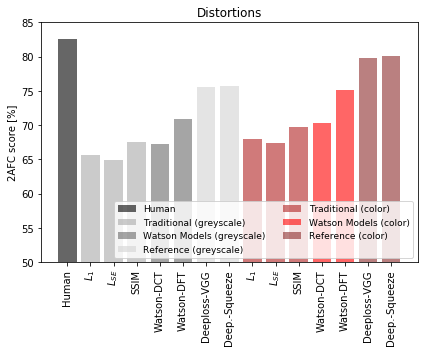

In [6]:
_ = plot_results(res, order=order, datasets=['val/cnn', 'val/traditional'], title='Distortions', per_dataset=False, labels=labels, display_names=display_names, legend='inside', figsize=(6,5))
plt.savefig('./plots/2AFC_score_comparison_distortions_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_distortions_4_paper.png')

Human: 69.3
$L_{1}$: 58.4
$L_{SE}$: 58.3
SSIM: 58.5
Watson-DCT: 57.0
Watson-DFT: 59.9
Deeploss-VGG: 61.0
Deep.-Squeeze: 61.6
$L_{1}$: 60.9
$L_{SE}$: 60.6
SSIM: 59.8
Watson-DCT: 55.5
Watson-DFT: 61.5
Deeploss-VGG: 63.5
Deep.-Squeeze: 64.8



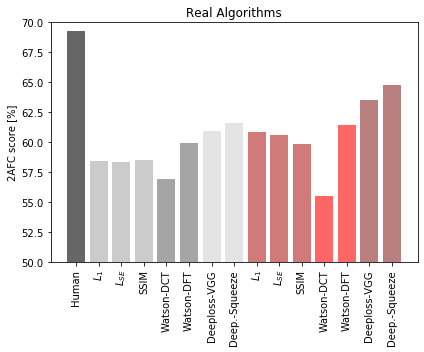

In [7]:
_ = plot_results(res, order=order, datasets=['val/color', 'val/deblur', 'val/superres', 'val/frameinterp'], title='Real Algorithms', per_dataset=False, labels=labels, display_names=display_names, legend=None, figsize=(6,5))

plt.savefig('./plots/2AFC_score_comparison_algorithms_4_paper.pdf')
plt.savefig('./plots/2AFC_score_comparison_algorithms_4_paper.png')
